# Keras 개발 Process

1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델)을 정의**
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    

3. **모델 Compile(컴파일)**
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    
    > Compile: 실행할 수 있는 상태로 만들어 주는 것.

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 Train 시킨다.

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

##### import

In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
# seed 값 설정
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

2.11.0


##### MNIST dataset Loading

In [2]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [3]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape
# (60000, 28, 28) : (개수, 데이터 shape-28 28)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# y값 확인
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

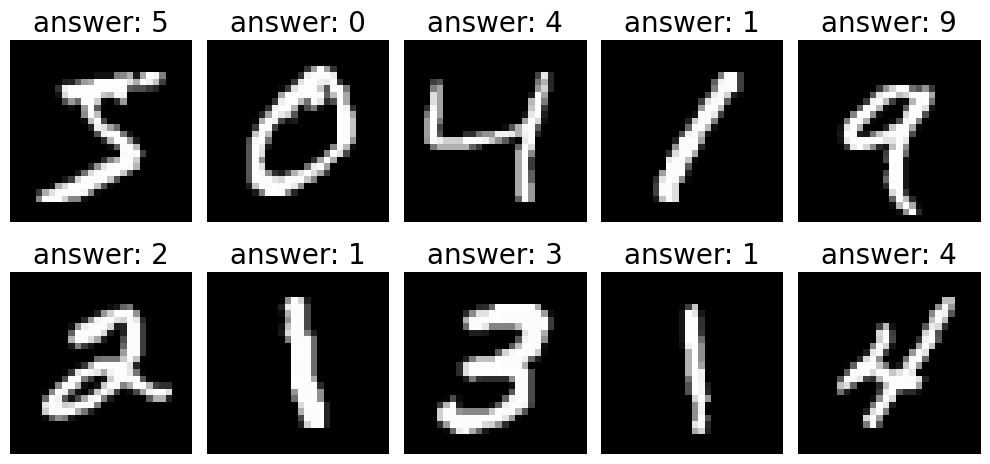

In [5]:
# X값 -image 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(f'answer: {train_label[i]}', fontsize=20)
    plt.axis('off')
plt.tight_layout()
plt.show()

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다.
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding 한다.
            - 딥러닝 모델이 각 Label별 확률을 출력하도록 정의 되기 때문에 y(정답)도 같은 형태로 만들어 줘야 한다.
    - Keras의 onehot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

In [6]:
train_image.dtype

dtype('uint8')

##### input image(X)를 정규화. 
- 이미지를 0 ~ 1 로 정규화 하고 타입을 float32로 변환

In [7]:
X_train = train_image.astype('float32')/255
X_test = test_image.astype('float32')/255

##### label(y)를 one hot encoding

In [8]:
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [9]:
y_train = keras.utils.to_categorical(train_label, num_classes=10)
y_test = keras.utils.to_categorical(test_label)

In [10]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 네트워크(모델) 정의
- Network : 전체 모델 구조

In [12]:
model = keras.Sequential() # (빈) 모델 생성
# 모델에 layer 들을 추가한다(받는다)
# 각 레이어는 이전 layer의 출력결과를 입력으로 받아서 처리한 뒤에 출력한다.
# layer는 Unit/Node/Neuron 들로 구성된다. -> feature들을 입력받아서 처리 후 출력하는 함수

# 첫번째 layer를 추가 -> 첫번째: Inputlayer를 추가
model.add(keras.layers.InputLayer((28, 28)))

model.add(keras.layers.Flatten()) # 입력데이터를 1차원 배열로 변환

model.add(keras.layers.Dense(units=256)) # unit 256개로 이뤄진 layer를 생성, 각 unit은 선형회귀(W*X + 8) 계산을 처리

model.add(keras.layers.ReLU()) # max(X, 0) -> Activation(활성) 함수 => 비선형 함수를 사용

model.add(keras.layers.Dense(units=128))

model.add(keras.layers.ReLU())

model.add(keras.layers.Dense(units=10))

model.add(keras.layers.Softmax(name ='output'))  # Output layer -> 모델의 출력 결과를 출력하는 layer

In [13]:
model2 = keras.Sequential([
    keras.layers.InputLayer((28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(256),
    keras.layers.ReLU(),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 output (Softmax)            (None, 10)                0

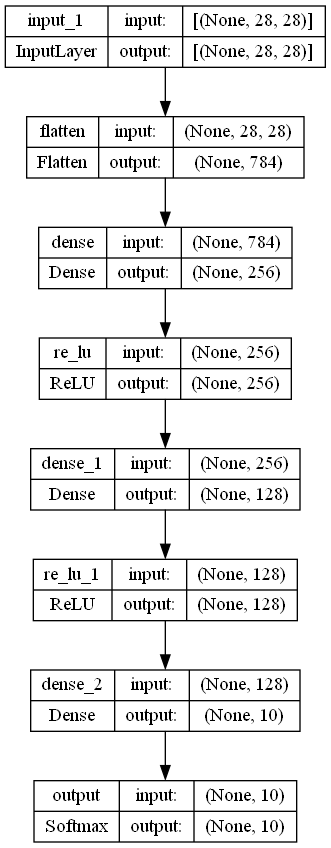

In [15]:
# 모델구조를 시각화 - graphviz
# pip install graphviz pydot pydotplus
keras.utils.plot_model(model,
                      show_shapes=True, # 각 layer의 input/output의 shape를 확인
                       to_file = 'model_shapes.png' # 저장할 파일명, 생략하면 model
                      )

## 컴파일 단계
- 정의된 딥러닝 모델을 학습할 수 있는 상태로 만들어 주기 위해 다음을 추가적으로 설정 한다.
    - Optimizer
    - 손실함수
    - 평가지표

In [16]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']) # 학습로그, 모델 평가 할 때 loss(loss함수가 계산한 오차값)와 같이 나올 평가지표

## 학습 (fit)
- model.fit()
    - 모델 학습 메소드. 
    - 학습과정의 Log를 History 객체로 반환한다.
- History : train 시 에폭별 평가지표값들을 모아서 제공.    

In [17]:
history = model.fit(X_train, y_train, # train dataset
                      epochs=10, # train dataset을 몇 번 반복해서 학습할 것인지, 한 epoch이 돌면 shuffle을 하게 된다.
                      batch_size = 100, # 파라미터(wight-학습대상) 업데이트 하기 위한 데이터 단위 -> 내접 계산으로 한번에 계산 가능(행렬)
                      # 한번 업데이트 되는 것을 1 step이라고 함. 1step에 입력할 데이터 개수: batch_size
                      # 위 모델에서 input 안에 있는 None이 batch_size를 의미한다 -> 설정 가능
                      # 작게 하면 시간이 오래 걸리고 이상치가 많아진다. / 크게 하면 메모리 공간이 부족해진다.
                      validation_split=0.3  # train set 중 validation으로 사용할 데이터 비율. 전체중 70은 train에 30은 검증에 사용하겠다.
                     )

Epoch 1/10
420/420 [==============================] - 5s 8ms/step - loss: 0.3011 - accuracy: 0.9131 - val_loss: 0.1626 - val_accuracy: 0.9524
Epoch 2/10
420/420 [==============================] - 3s 7ms/step - loss: 0.1164 - accuracy: 0.9657 - val_loss: 0.1224 - val_accuracy: 0.9648
Epoch 3/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.1042 - val_accuracy: 0.9691
Epoch 4/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.1033 - val_accuracy: 0.9696
Epoch 5/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.1065 - val_accuracy: 0.9702
Epoch 6/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0917 - val_accuracy: 0.9744
Epoch 7/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0983 - val_accuracy: 0.9738
Epoch 

```python
Epoch 1/10 # 현재 epoch/전체 epoch -> 몇번째 epoch 결과
420/420 # 현재 학습중인 step/전체step 600*0.7
- 5s 8ms/step   #epoch당 걸린시간(s) 1step당 걸린 학습시간(ms)

# train set 평가 결과
- loss: 0.2978  # loss(손실-오차값)
- accuracy: 0.9154  # 컴파일 때 지정한 metrics의 결과

# validation set 평가 결과
- val_loss: 0.1620
- val_accuracy: 0.9526

```

##### History 시각화

In [18]:
print(type(history))  # 학습 과정의 평가지표들 등의 정보를 저장한 객체
print('학습 epoch 리스트',history.epoch)
print('epoch수, epoch당 step수',history.params)

<class 'keras.callbacks.History'>
학습 epoch 리스트 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
epoch수, epoch당 step수 {'verbose': 1, 'epochs': 10, 'steps': 420}


In [19]:
history.history

{'loss': [0.3011314570903778,
  0.11638977378606796,
  0.07362967729568481,
  0.05045871064066887,
  0.03561565652489662,
  0.027958042919635773,
  0.021855616942048073,
  0.01869449019432068,
  0.013603350147604942,
  0.011853620409965515],
 'accuracy': [0.9130714535713196,
  0.9657381176948547,
  0.9778571724891663,
  0.9841428399085999,
  0.9890000224113464,
  0.9915714263916016,
  0.9930238127708435,
  0.9940952658653259,
  0.9957619309425354,
  0.9963571429252625],
 'val_loss': [0.16256049275398254,
  0.12243920564651489,
  0.10424549132585526,
  0.1033269390463829,
  0.10645263642072678,
  0.09173499792814255,
  0.09834321588277817,
  0.09907286614179611,
  0.10540685802698135,
  0.11643087863922119],
 'val_accuracy': [0.9524444341659546,
  0.9648333191871643,
  0.9690555334091187,
  0.9696111083030701,
  0.9702222347259521,
  0.9743888974189758,
  0.9738333225250244,
  0.9750000238418579,
  0.9739444255828857,
  0.9738888740539551]}

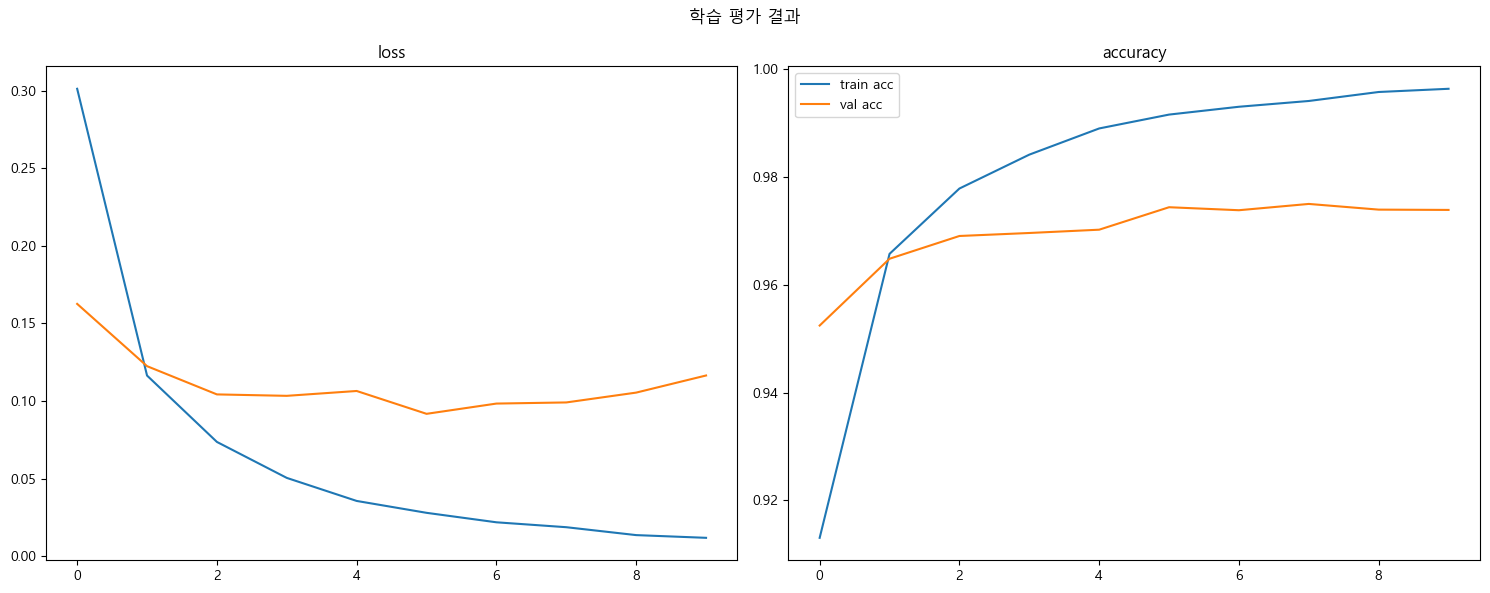

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = True

plt.figure(figsize=(15, 6))
plt.suptitle('학습 평가 결과') # figure 제목

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('accuracy')

plt.legend()
plt.tight_layout()
plt.show()

> epoch가 클수록 성능이 나빠질 수 있다. 다만 좋아질 수도 있다 -> epoch를 최대한 높게 잡아줘서 확인해봐야한다.

## 테스트셋 평가

In [21]:
result = model.evaluate(X_test, y_test)  # loss, compile시 지정한 metrics로 평가

313/313 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9777


## 새로운 데이터 추론
- 새로운 데이터를 추론하기 전에 학습데이터에 했던 전처리과정을 동일하게 적용 한 뒤 추론한다.

### 추론 메소드
- predict()
    - **분류:** 각 클래스 별 확률 반환
    - **회귀:** 최종 예측 결과
- 분류문제일때 predict() 결과에서 class label 출력하기    
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis=1)`

In [22]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [23]:
pred = model.predict(X_new)  # 추론: (개수, 데이터 shape)

1/1 [==============================] - 0s 192ms/step


In [24]:
print(pred.shape)
pred

(3, 10)


array([[4.38040892e-08, 2.06434070e-09, 1.68668635e-06, 1.94175300e-06,
        2.66654069e-14, 5.64318370e-10, 1.65416053e-12, 9.99996185e-01,
        3.71172426e-08, 1.28337945e-07],
       [5.40912042e-13, 4.94899854e-09, 1.00000000e+00, 7.49300275e-11,
        3.60161185e-19, 5.41380043e-19, 9.58043603e-16, 8.74524757e-15,
        1.08660074e-10, 1.11546711e-20],
       [6.34963897e-07, 9.99662876e-01, 2.67261603e-05, 7.74690108e-08,
        1.04325678e-04, 7.78529152e-09, 2.46357459e-08, 1.79896233e-04,
        1.92662737e-05, 6.29496162e-06]], dtype=float32)

In [27]:
np.round(pred)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
np.argmax(pred, axis=-1)

array([7, 2, 1], dtype=int64)

In [26]:
np.argmax(y_test[:3], axis=-1)

array([7, 2, 1], dtype=int64)

# TODO

1. opencv로 그림판 숫자이미지들을 읽는다. (grayscale)

In [29]:
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.7.0.68-cp37-abi3-win_amd64.whl (44.9 MB)


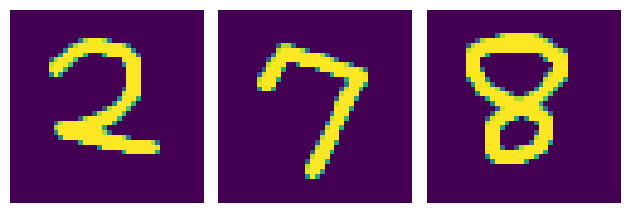

In [29]:
import cv2
import numpy as np

img1 = cv2.imread('test_img/number_2.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test_img/number_7.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('test_img/number_8.png', cv2.IMREAD_GRAYSCALE)


plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.axis('off')

plt.tight_layout()
plt.show()

2. 28 X 28 로 resize

In [35]:
two = cv2.resize(img1, dsize=(28, 28), interpolation = cv2.INTER_AREA)
seven = cv2.resize(img2, dsize=(28, 28), interpolation = cv2.INTER_AREA)
eight = cv2.resize(img3, dsize=(28, 28), interpolation = cv2.INTER_AREA)

In [36]:
resized_img1.shape

(28, 28)

In [39]:
cv2.imshow('frame', two)
cv2.waitKey(0)
cv2.imshow('frame', seven)
cv2.waitKey(0)
cv2.imshow('frame', eight)
cv2.waitKey(0)
cv2.destroyAllWindows()

3. 모델을 이용해서 추론

### 이미지 전처리
- float으로 변환, scaling

In [42]:
new_data = np.array([two.astype('float32')/255,
                   seven.astype('float32')/255,
                   eight.astype('float32')/255])

In [43]:
newX = np.array([two, seven, eight])
pred = model.predict(newX)

1/1 [==============================] - 0s 46ms/step


In [44]:
np.argmax(pred, axis=-1)

array([2, 7, 8], dtype=int64)